<a href="https://colab.research.google.com/github/alearauj/Alura-Data-Visualization/blob/main/EBA_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Projeto Final do curso EBA - Estatística do Básico ao Avançado**

O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

Perguntas a serem respondidas:


1.   Qual o perﬁl de indivíduos (adultos maiores de 18 anos) com  sintomas depressivos nos EUA no período de 2005-2006?
2.   Hábitos saudáveis de alimentação e atividade física estão
associados a menores índices de depressão nesta população?

Clique aqui para encontrar o dicionário dos dados: https://drive.google.com/drive/folders/1PkFbW6HT60JNnjL-tC0a9HXC563KHyuM

###**Preparando o ambiente**

**Importando todas as bibliotecas necessárias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Liberando acesso ao drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Carregando o dataset**

**Importando os datasets**

In [ ]:
df1 = pd.read_csv("//content/drive/MyDrive/Cursos/Renata Biaggi - Estatística do básico ao avançado/Projeto Final - Teste de Hipótese/DEMO_PHQ.csv", encoding = "UTF-8")

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Cursos/Renata Biaggi - Estatística do básico ao avançado/Projeto Final - Teste de Hipótese/PAG_HEI.csv", encoding = "UTF-8")

In [ ]:
#Unindo os arquivos
df = pd.merge(df1, df2, on='SEQN', how='left')

###**Conhecendo os dados**


**Checar tamanho do arquivo**

In [ ]:
df.shape

(5334, 31)

**Conhecer o dataset**

In [ ]:
df.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,5.000000,1.153747,0.000000,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.361618,5.000000,0.000000,4.780404,0.000000,5.138144,5.601160,4.677064,41.001689
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,4.093324,0.000000,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.287457,5.000000,5.000000,5.000000,2.805860,9.298090,10.000000,6.738039,0.000000,47.002405


In [ ]:
df.tail()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
5333,41473,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


**Encontrar valores nulos**

In [ ]:
df.isna().sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
dtype: i

Precisamos entender o que os valores nulos significam em cada uma das colunas para definirmos o que faremos com eles.

*   As colunas **DPQ** indicam o sentimento do respondente nas duas últimas semanas. As linhas vazias indicam que o respondente não respondeu sobre como ele estava se sentindo. Temos 498 respondentes que não preencheram tais informações. Isso representa quase 10% do dataframe.
*   A coluna **INDFMINC** indica a renda anual familiar em USD. Temos 47 respondentes que não informaram sua renda.
*   As colunas **HEI2015C** informam o hábito alimentar de cada respondente. Temos 274 respondentes que não responderam sobre seus hábitos.

**Encontrar valores duplicados**

In [ ]:
df.duplicated().sum()

0

**Entender a distribuição estatística do dataset**

In [ ]:
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,...,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,...,1.764918,3.756967,4.434237,2.593381,4.706986,4.762261,5.798963,6.067985,6.220367,49.971421
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,...,1.915425,1.605226,1.008311,2.171836,3.237059,3.420252,3.496261,3.178186,3.330305,12.324533
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.591999,4.171156,0.000000,2.023710,1.587909,2.925413,3.697080,3.724867,41.032289
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.026125,4.940948,5.000000,2.588240,4.430397,4.833553,6.234319,6.414811,6.864138,49.512445
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.406820,5.000000,5.000000,5.000000,7.270784,7.650807,9.253265,8.997076,9.454234,58.168013
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


**Checar se as colunas estão com o tipo adequado de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

**Ponto de atenção**: Nem todas as colunas estão com o formato adequado para a informação que o dado quer apresentar. Por exemplo,todas as colunas contendo **DPQ**, **INDFMINC**  e **ADHERENCE**  estão como FLOAT quando deveriam ser INT64 já que possuem valores representados por códigos numéricos de valor inteiro. Além disso, a coluna **SEQN** está como INT64, o que não está errado, mas como essa coluna é nosso código identificador e não queremos fazer nenhum cálculo com ela, vamos convertê-la para STR.

In [ ]:
#Entendendo a estatística descritiva de algumas colunas

colunas_descritiva = ['INDFMINC','PAG_MINW','ADHERENCE','HEI2015_TOTAL_SCORE']

descritiva = df[colunas_descritiva].describe()

print(descritiva)

          INDFMINC      PAG_MINW    ADHERENCE  HEI2015_TOTAL_SCORE
count  5287.000000   5334.000000  5334.000000          5060.000000
mean      8.738604    471.765732     1.979753            49.971421
std      12.777756    780.352823     0.918364            12.324533
min       1.000000      0.000000     1.000000            16.059212
25%       4.000000     35.000000     1.000000            41.032289
50%       7.000000    210.000000     2.000000            49.512445
75%      10.000000    568.931871     3.000000            58.168013
max      99.000000  10777.829099     3.000000            89.529383


Vamos analisar a estatística descritiva das 4 colunas separadamente:



1. INDFMINC (renda anual familiar): os valores indicam que 50% da amostra ganha de 35000 a 44999. Sabendo que a média é de 55000-64999, entendemos que os outros 50% da amostra que ganham mais que 35000 puxam a média para cima. Os valores estão condizentes dentre as possibilidades da coluna.
2. PAG_MINW (tempo total semanal de atividade em minutos): o valor máximo indica que temos valores indevidos no dataset, pois 10777 minutos é o equivalente a mais de 25h por dia de exercício físico, o que sabemos que não é possível. Precisamos remover esse dado.
3. ADHERENCE (categoria para determinar se o usuário atende ao tempo adequado de exercício semanal): 50% da amostra pratica atividade física em uma duração adequada. Os valores estão condizentes dentre as possibilidades da coluna.
4. HEI2015_TOTAL_SCORE (score total que varia de 0 a 100): Vemos que o score dos hábitos saudáveis chegam em 58 para 75% da amostra, o que é baixo quando pensamos que o limite máximo é 100. Os valores estão condizentes dentre as possibilidades da coluna.

###**Tratamento dos Dados**

In [ ]:
#Vamos manter as linhas vazias da coluna DPQ, mas vamos preenchê-la com o valor "7" que significa "Se recusou a responder".
DPQs_NaN = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
df[DPQs_NaN] = df[DPQs_NaN].replace(np.nan,7)

In [ ]:
#Vamos manter as linhas vazias da coluna INDFMINC, mas vamos preenchê-la com o valor "77" que significa "Se recusou a responder".
INDFMINC_NaN = ['INDFMINC']
df[INDFMINC_NaN] = df[INDFMINC_NaN].replace(np.nan,77)

In [ ]:
#Vamos remover os respondentes que não possuem valores nas colunas de score de hábitos alimentares.
remover_vazio = ['HEI2015C1_TOTALVEG', 	'HEI2015C2_GREEN_AND_BEAN', 	'HEI2015C3_TOTALFRUIT', 	'HEI2015C4_WHOLEFRUIT', 	'HEI2015C5_WHOLEGRAIN', 	'HEI2015C6_TOTALDAIRY', 	'HEI2015C7_TOTPROT', 	'HEI2015C8_SEAPLANT_PROT', 	'HEI2015C9_FATTYACID', 	'HEI2015C10_SODIUM', 	'HEI2015C11_REFINEDGRAIN', 	'HEI2015C12_SFAT', 	'HEI2015C13_ADDSUG', 	'HEI2015_TOTAL_SCORE']
df = df.dropna(subset=remover_vazio)

In [ ]:
#Convertendo a coluna INT para STR
coluna_int64 = 'SEQN'
df[coluna_int64] = df[coluna_int64].astype(str)

<ipython-input-18-b3cdd0737f02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_int64] = df[coluna_int64].astype(str)


In [ ]:
#Convertendo as colunas de FLOAT para INT
colunas_float = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090','INDFMINC','ADHERENCE']
df[colunas_float] = df[colunas_float].astype('int64')

<ipython-input-19-c8c62df77931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colunas_float] = df[colunas_float].astype('int64')


In [ ]:
#Conhecendo o novo dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5060 entries, 1 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5060 non-null   object 
 1   DPQ010                    5060 non-null   int64  
 2   DPQ020                    5060 non-null   int64  
 3   DPQ030                    5060 non-null   int64  
 4   DPQ040                    5060 non-null   int64  
 5   DPQ050                    5060 non-null   int64  
 6   DPQ060                    5060 non-null   int64  
 7   DPQ070                    5060 non-null   int64  
 8   DPQ080                    5060 non-null   int64  
 9   DPQ090                    5060 non-null   int64  
 10  RIAGENDR                  5060 non-null   int64  
 11  RIDAGEYR                  5060 non-null   int64  
 12  RIDRETH1                  5060 non-null   int64  
 13  DMDEDUC                   5060 non-null   int64  
 14  INDFMINC

In [ ]:
#Renomeando colunas
mapeamento_colunas = {'RIAGENDR': 'Genero', 'RIDAGEYR': 'Idade', 'RIDRETH1': 'Etnia', 'DMDEDUC': 'Escolaridade', 'INDFMINC': 'Renda Anual Familiar (USD)', 'PAG_MINW': 'Tempo de Atividade Fisica (min)', 'ADHERENCE': 'Aderencia', 'HEI2015_TOTAL_SCORE': 'Score Total'}
df = df.rename(columns=mapeamento_colunas)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5060 entries, 1 to 5333
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SEQN                             5060 non-null   object 
 1   DPQ010                           5060 non-null   int64  
 2   DPQ020                           5060 non-null   int64  
 3   DPQ030                           5060 non-null   int64  
 4   DPQ040                           5060 non-null   int64  
 5   DPQ050                           5060 non-null   int64  
 6   DPQ060                           5060 non-null   int64  
 7   DPQ070                           5060 non-null   int64  
 8   DPQ080                           5060 non-null   int64  
 9   DPQ090                           5060 non-null   int64  
 10  Genero                           5060 non-null   int64  
 11  Idade                            5060 non-null   int64  
 12  Etnia               

In [ ]:
#Removendo valores impossíveis
filtro1 = df['Tempo de Atividade Fisica (min)'] < 10000

In [ ]:
#Aplicar os filtros e criar o novo dataframe
df = df[filtro1]

# Checando novo dataframe
df.shape

(5056, 31)

###**Análise Exploratória**

<Axes: >

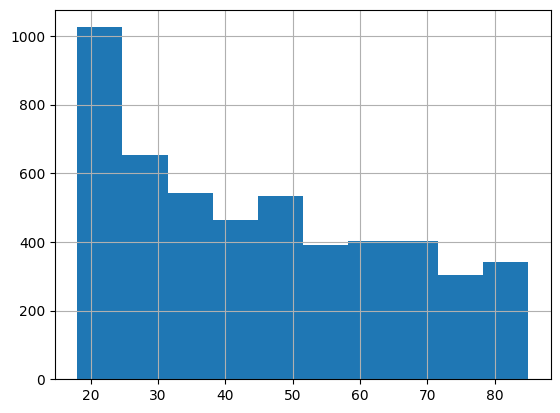

In [ ]:
df['Idade'].hist()

###**Pergunta 1 - Perfil de Indivíduos com Sintomas Depressivos**

In [ ]:
#Análise Exploratória

#Filtrar indivíduos onde os índices não são 0 e 1, 7 e 9, ou seja, é 2 e 3

#qual a renda familiar, qual gênero, quais os hábitos alimentares, qual a idade, qual etnia, qual a escolaridade

#Trazer histograma, boxplot, countplot, scatter, percentis e quartis

In [ ]:
filtro_DPQ010 = df[(df['DPQ010'] == 2) | (df['DPQ010'] == 3)]
filtro_DPQ020 = df[(df['DPQ020'] == 2) | (df['DPQ020'] == 3)]
filtro_DPQ030 = df[(df['DPQ030'] == 2) | (df['DPQ030'] == 3)]
filtro_DPQ040 = df[(df['DPQ040'] == 2) | (df['DPQ040'] == 3)]
filtro_DPQ050 = df[(df['DPQ050'] == 2) | (df['DPQ050'] == 3)]
filtro_DPQ060 = df[(df['DPQ060'] == 2) | (df['DPQ060'] == 3)]
filtro_DPQ070 = df[(df['DPQ070'] == 2) | (df['DPQ070'] == 3)]
filtro_DPQ090 = df[(df['DPQ080'] == 2) | (df['DPQ080'] == 3)]
filtro_DPQ090 = df[(df['DPQ090'] == 2) | (df['DPQ090'] == 3)]

In [ ]:
# Entendendo a estatística descritiva de algumas colunas
colunas_descritiva = ['Idade','Renda Anual Familiar (USD)','Tempo de Atividade Fisica (min)','Aderencia','Score Total']
descritiva = df[colunas_descritiva].describe()
print(descritiva)

             Idade  Renda Anual Familiar (USD)  \
count  5056.000000                 5056.000000   
mean     44.903481                    9.092959   
std      19.988191                   13.423456   
min      18.000000                    1.000000   
25%      27.000000                    5.000000   
50%      42.000000                    7.000000   
75%      61.000000                   10.000000   
max      85.000000                   99.000000   

       Tempo de Atividade Fisica (min)    Aderencia  Score Total  
count                      5056.000000  5056.000000  5056.000000  
mean                        470.294634     1.990111    49.979002  
std                         737.018502     0.918165    12.322359  
min                           0.000000     1.000000    16.059212  
25%                          41.570439     1.000000    41.034792  
50%                         212.471132     2.000000    49.522808  
75%                         580.254042     3.000000    58.172212  
max          

<Axes: >

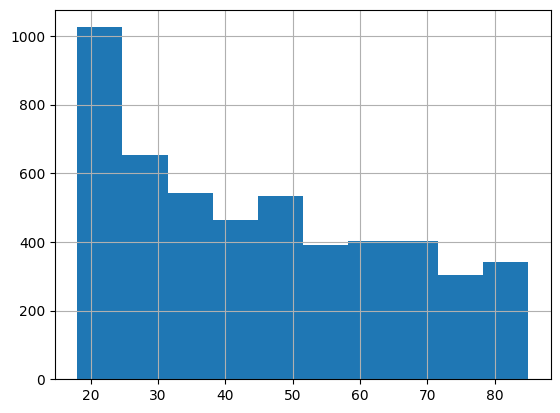

In [ ]:
# Entendendo a distribuição de renda das pessoas

df['Idade'].hist()

<Axes: xlabel='DPQ010', ylabel='count'>

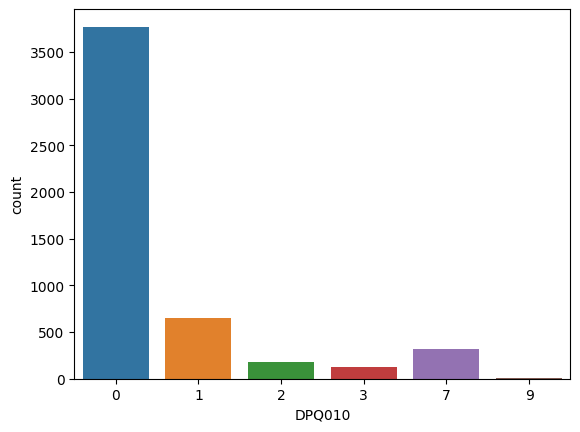

In [ ]:
sns.countplot(x=df['DPQ010'])

###**Teste de Hipótese - Teste-t independente**

**Pergunta 2 - A média**